 Import librairie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


### Import data

In [4]:
df = pd.read_csv('housing.csv')

df.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


###  Data cleansing

In [5]:
df.duplicated().sum()
df = df.dropna()
df.shape

(20433, 10)

### Data analyse (Le graphique donne une vue d'ensemble visuelle de la répartition géographique des prix immobiliers :

    Où se trouvent les maisons les plus chères ?
    Quelles zones sont plus abordables ?
    Comment les prix varient spatialement ?

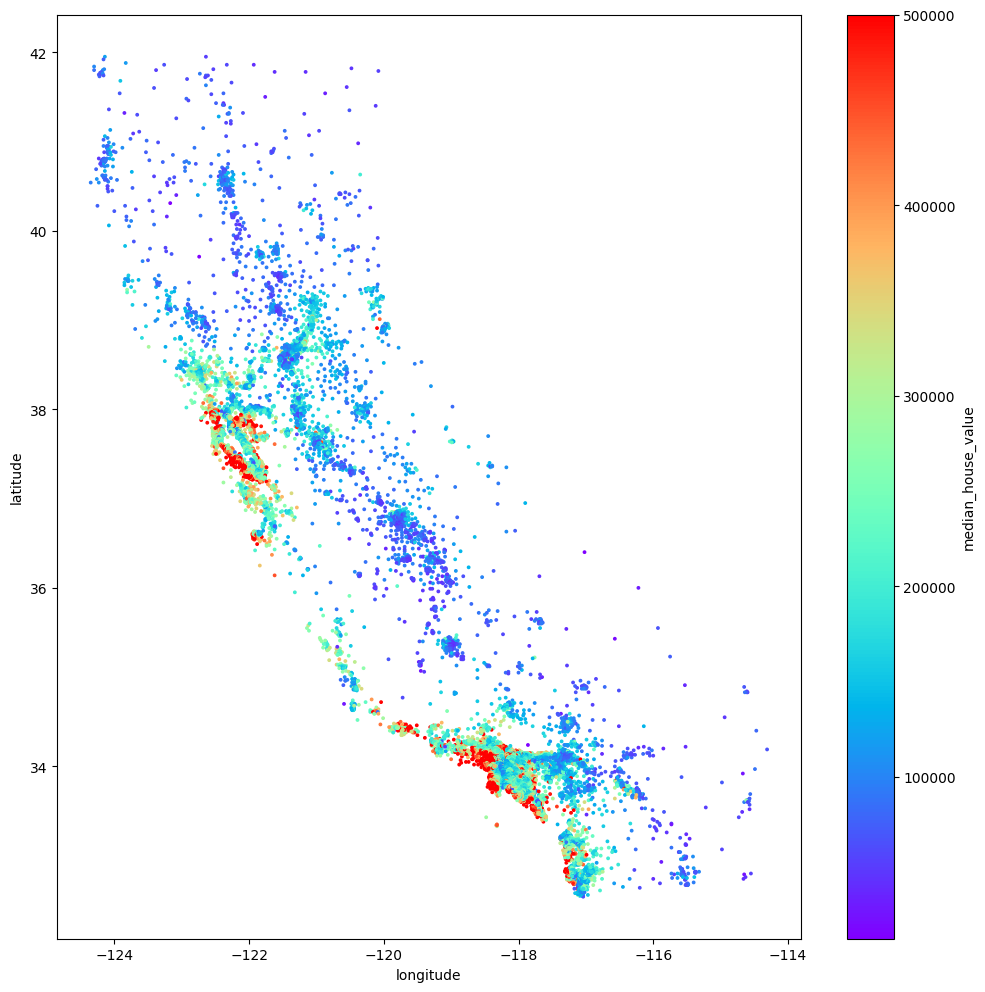

In [6]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'median_house_value', cmap = 'rainbow', s = 3,figsize = (12, 12))
plt.show()

Ce graphique est très utile pour visualiser les variations géographiques d'une catégorie (ocean_proximity) sur une région

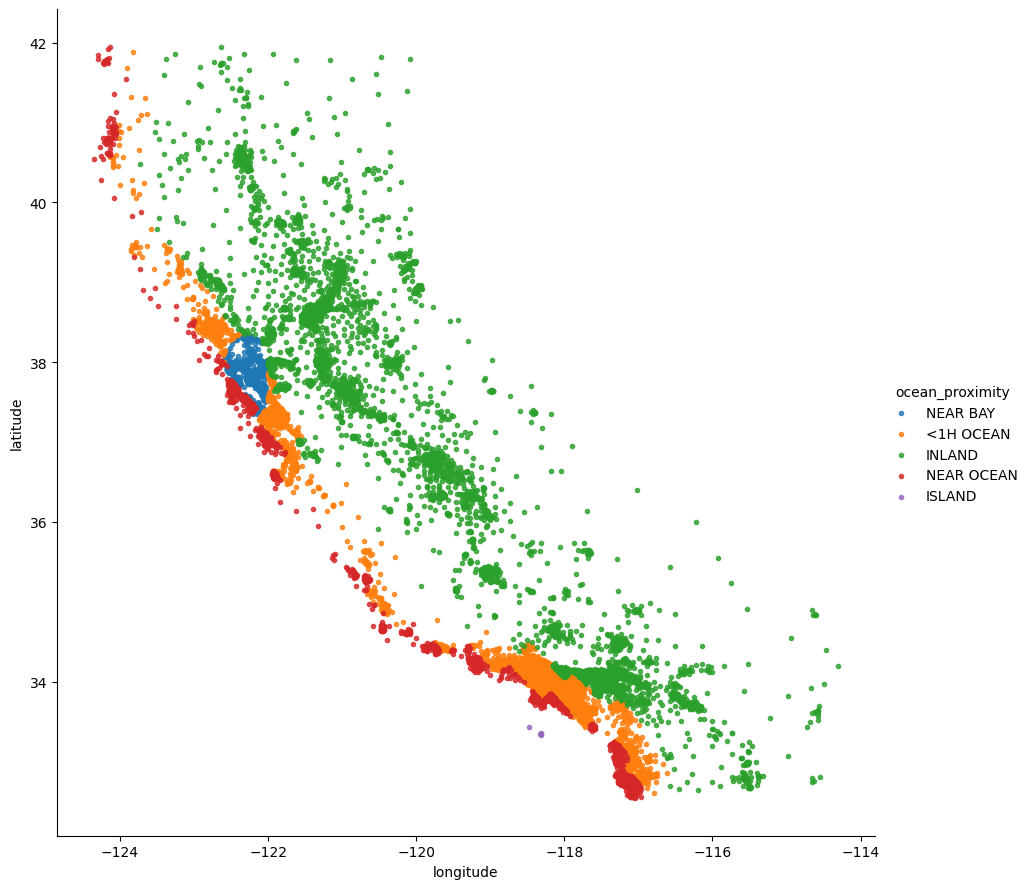

In [7]:
sns.lmplot(x = 'longitude', y = 'latitude', data = df, markers = '.', hue = 'ocean_proximity', fit_reg = False, height = 9)
plt.show()

In [8]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


préparer des données catégorielles

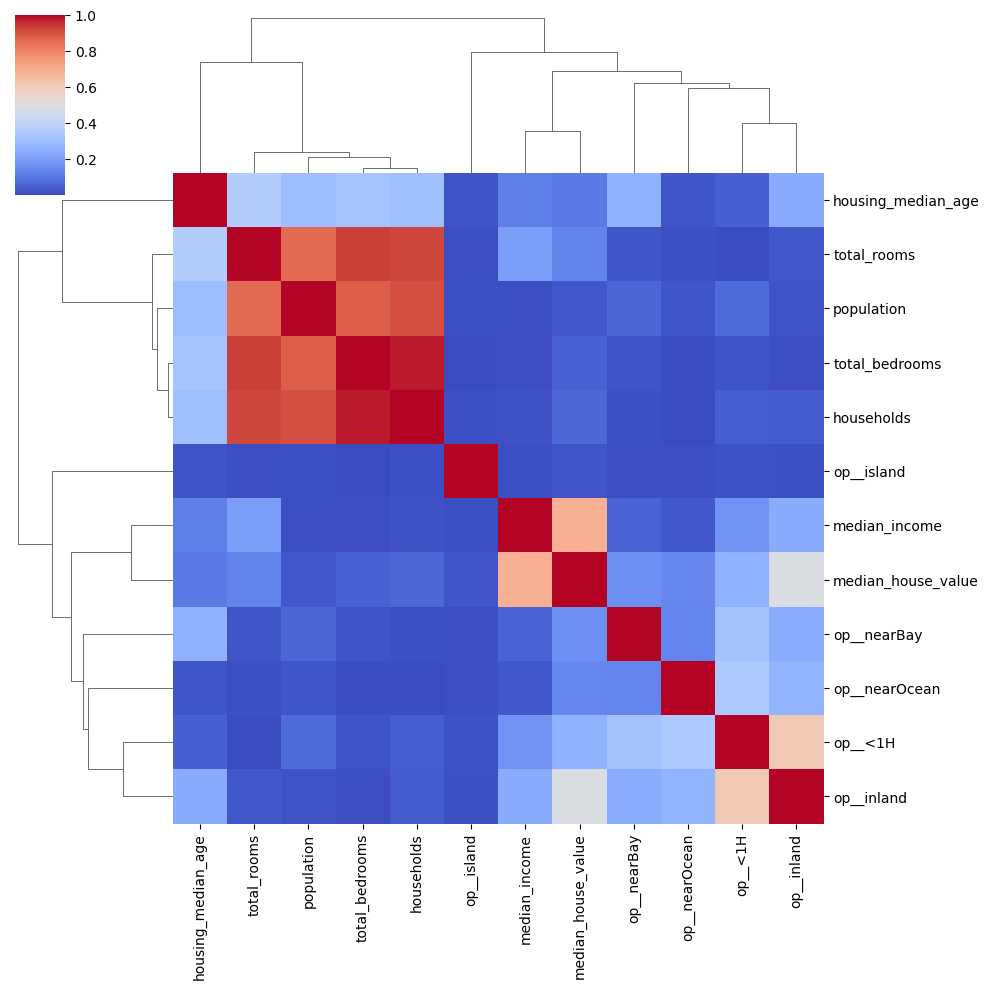

In [9]:


# Renommage des modalités de la variable 'ocean_proximity' afin de pouvoir avoir des noms d'indicatrices propres et sans espaces
df['ocean_proximity'] = df['ocean_proximity'].replace(to_replace = ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
                                                      value = ['inland', '<1H', 'nearOcean', 'nearBay', 'island'])

# Transformation de la variable 'ocean_proximity' en variables indicatrices
df = df.join(pd.get_dummies(df['ocean_proximity'], prefix = 'op_')).drop(['ocean_proximity'], axis = 1)

# Affichage d'une heatmap des corrélations entre les variables de df selon le critère de Pearson, regroupées par clusters classés par proximité
sns.clustermap(abs(df.drop(['longitude', 'latitude'], axis = 1).corr(method = 'pearson')), cmap = "coolwarm")
plt.show()



### Séparation des données

In [10]:
# Stockage de la variable cible 'median_house_value' dans un vecteur nommé 'target'
target = df['median_house_value']

# Stockage des variables explicatives dans un DataFrame nommé 'explanatory_vars'
explanatory_vars = df.drop(['median_house_value'], axis = 1)

# Séparation en un jeu d'apprentissage contenant 80% des données et un jeu de test avec les données restantes
X_train, X_test, y_train, y_test = train_test_split(explanatory_vars, target, test_size = 0.2, random_state = 42)

### Régression linéaire ( prédire des valeurs continues)

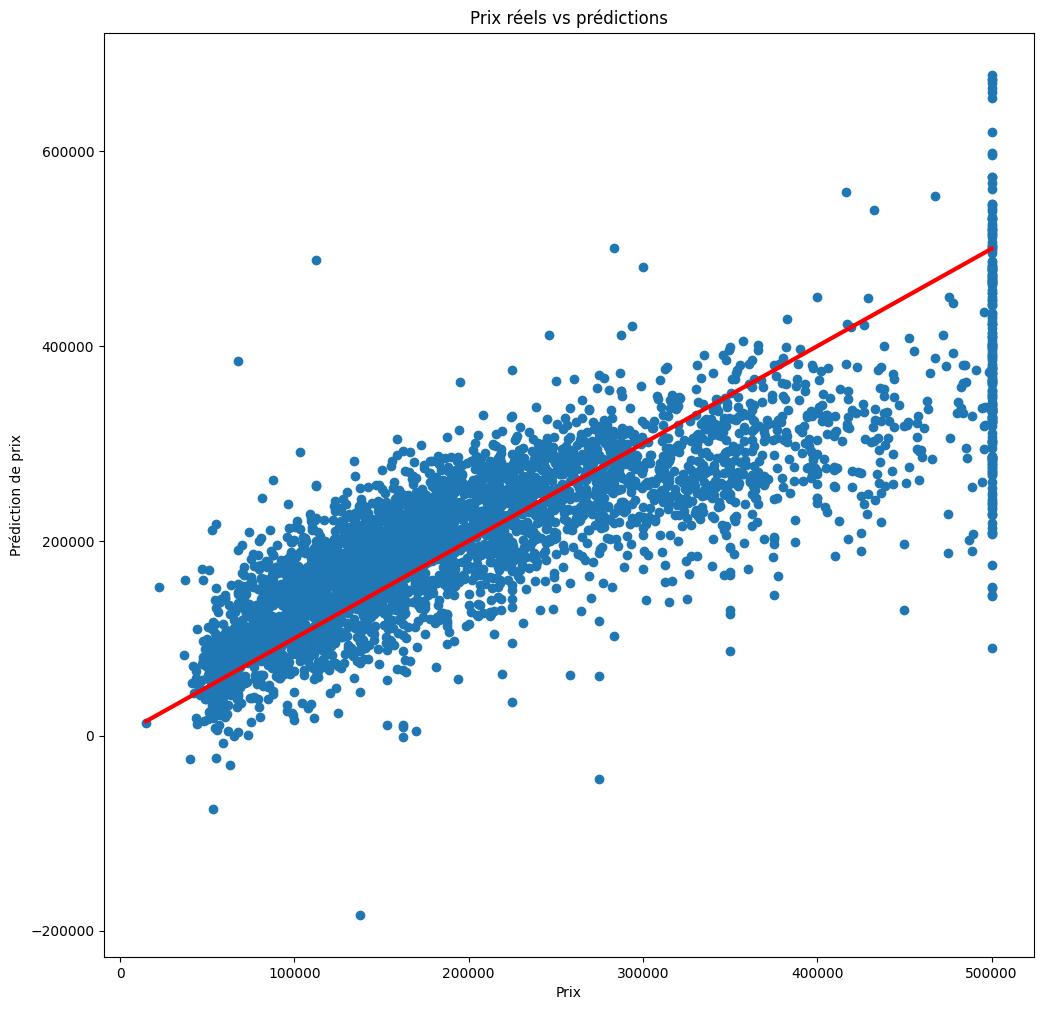

RMSE: 69297.71669113015
R²: 0.6488402154432009


In [13]:
# Instanciation d'un modèle de régression linéaire nommé "lin_reg" à l'aide de la classe LinearRegression
lin_reg = LinearRegression()

# Entraînement de notre modèle lin_reg
lin_reg.fit(X_train, y_train)

# Stockage des prédictions effectuées par notre modèle lin_reg dans un vecteur y_lin_reg
y_lin_reg = lin_reg.predict(X_test)

# Comparaison entre la prédiction de notre modèle lin_reg et les résultats attendus
plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_lin_reg)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', linewidth = 3)
plt.xlabel("Prix")
plt.ylabel("Prédiction de prix")
plt.title("Prix réels vs prédictions")
plt.show()

# Calcul de la racine carrée de l'erreur quadratique moyenne (rmse)
rmse = np.sqrt(mean_squared_error(y_test, y_lin_reg))

# Calcul du coefficient de détermination R²
r2 = r2_score(y_test, y_lin_reg)

# Affichage des résultats
print(f"RMSE: {rmse}")
print(f"R²: {r2}")



### Régression lineaire

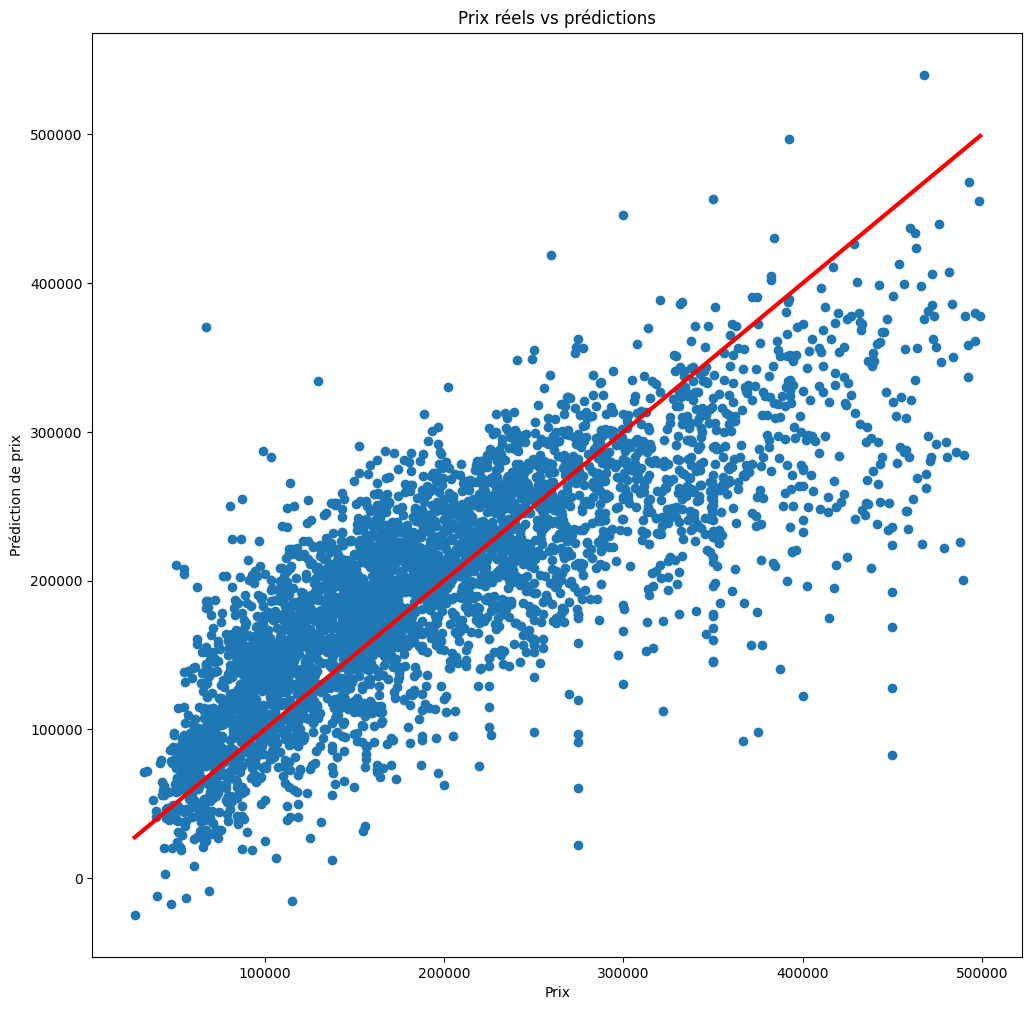

RMSE: 60545.69149401045
R2:0.6243691377037257


In [14]:
# Filtre sur les maisons qui font moins de 500 000 USD
df_inliers = df.loc[df['median_house_value'] < 500000]

target_inliers = df_inliers['median_house_value']
explanatory_vars_inliers = df_inliers.drop(['median_house_value'], axis = 1)
X_train_inliers, X_test_inliers, y_train_inliers, y_test_inliers = train_test_split(explanatory_vars_inliers, target_inliers, test_size = 0.2, random_state = 42)

lin_reg_inliers = LinearRegression()
lin_reg_inliers.fit(X_train_inliers, y_train_inliers)
y_lin_reg_inliers = lin_reg_inliers.predict(X_test_inliers)

plt.figure(figsize = (12, 12))
plt.scatter(y_test_inliers, y_lin_reg_inliers)
plt.plot([y_test_inliers.min(), y_test_inliers.max()],[y_test_inliers.min(), y_test_inliers.max()], color = 'red', linewidth = 3)
plt.xlabel("Prix")
plt.ylabel("Prédiction de prix")
plt.title("Prix réels vs prédictions")
plt.show()

# Calcul de la racine carré de l'erreur quadratique moyenne (rmse)
rmse=np.sqrt(mean_squared_error(y_test_inliers, y_lin_reg_inliers))

# Calcul du coefficient de détermination

r2_lin_reg = r2_score(y_test_inliers, y_lin_reg_inliers)

print(f"RMSE: {rmse}")
print(f"R2:{r2_lin_reg}")

### Régression basée sur des forêts aléatoires

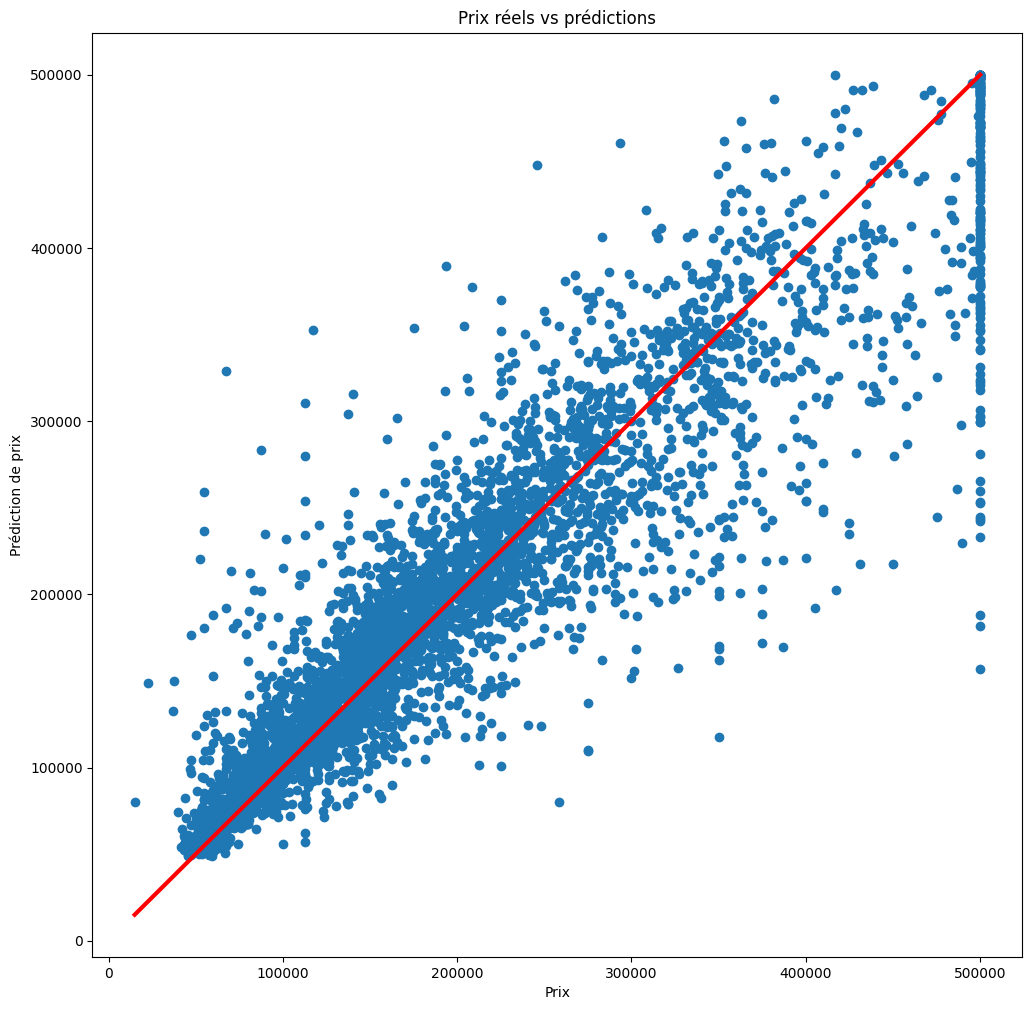

RMSE: 48766.762506855084
R2:0.8260939169574837


In [15]:
# Instanciation d'un modèle de régression RandomForestRegressor
rf_reg = RandomForestRegressor()

# Entraînement de notre modèle rf_reg
rf_reg.fit(X_train, y_train)

# Stockage des prédictions effectuées par notre modèle rf_reg dans un vecteur y_rf_reg
y_rf_reg = rf_reg.predict(X_test)

# Comparaison entre la prédiction de notre modèle rf_reg et les résultats attendus
plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_rf_reg)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', linewidth = 3)
plt.xlabel("Prix")
plt.ylabel("Prédiction de prix")
plt.title("Prix réels vs prédictions")
plt.show()

# Calcul du coefficient de détermination du modèle
r2_rf_reg = rf_reg.score(X_test, y_test)

# Calcul du RMSE de notre modèle rf_reg
rmse=np.sqrt(mean_squared_error(y_test, y_rf_reg))

print(f"RMSE: {rmse}")
print(f"R2:{r2_rf_reg}")

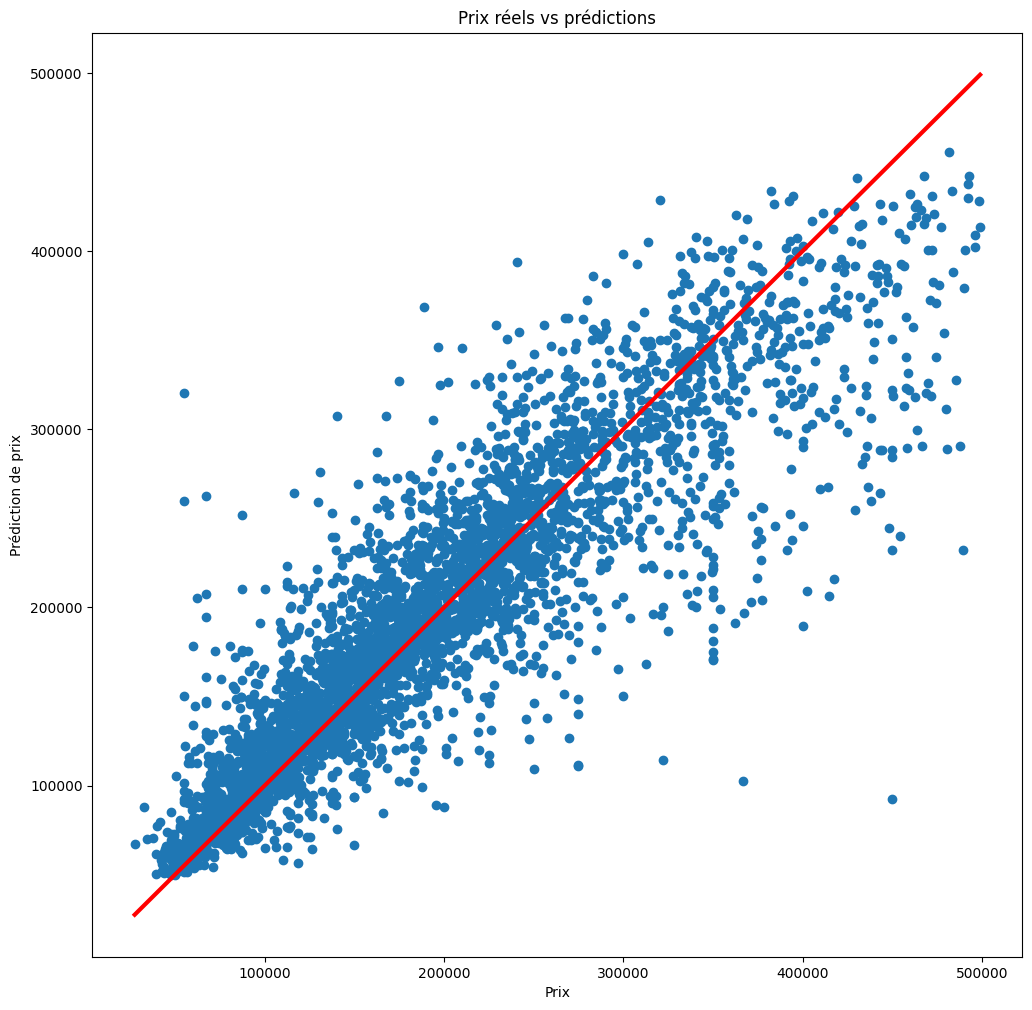

R2 (RandomForestRegressor avec filtrage): 0.7943904467638485


In [16]:
# Filtre sur les maisons qui font moins de 500 000 USD
df_inliers = df.loc[df['median_house_value'] < 500000 ]

target_inliers = df_inliers['median_house_value']
explanatory_vars_inliers = df_inliers.drop(['median_house_value'], axis=1)

# Division des données en ensembles d'entraînement et de test
X_train_inliers, X_test_inliers, y_train_inliers, y_test_inliers = train_test_split(
    explanatory_vars_inliers, target_inliers, test_size=0.2, random_state=42
)

# Instanciation d'un modèle de régression RandomForestRegressor
rf_reg_inliers = RandomForestRegressor()

# Entraînement de notre modèle rf_reg_inliers
rf_reg_inliers.fit(X_train_inliers, y_train_inliers)

# Stockage des prédictions effectuées par notre modèle rf_reg_inliers dans un vecteur y_rf_reg_inliers
y_rf_reg_inliers = rf_reg_inliers.predict(X_test_inliers)

# Calcul du coefficient de détermination du modèle
r2_rf_reg_inliers = r2_score(y_test_inliers, y_rf_reg_inliers)

# Comparaison entre la prédiction de notre modèle rf_reg_inliers et les résultats attendus
plt.figure(figsize=(12, 12))
plt.scatter(y_test_inliers, y_rf_reg_inliers)
plt.plot([y_test_inliers.min(), y_test_inliers.max()], [y_test_inliers.min(), y_test_inliers.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prédiction de prix")
plt.title("Prix réels vs prédictions")
plt.show()

print(f"R2 (RandomForestRegressor avec filtrage): {r2_rf_reg_inliers}")



MLPRegressor (modèle de régression basé sur un réseau de neurones à couches multiples)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


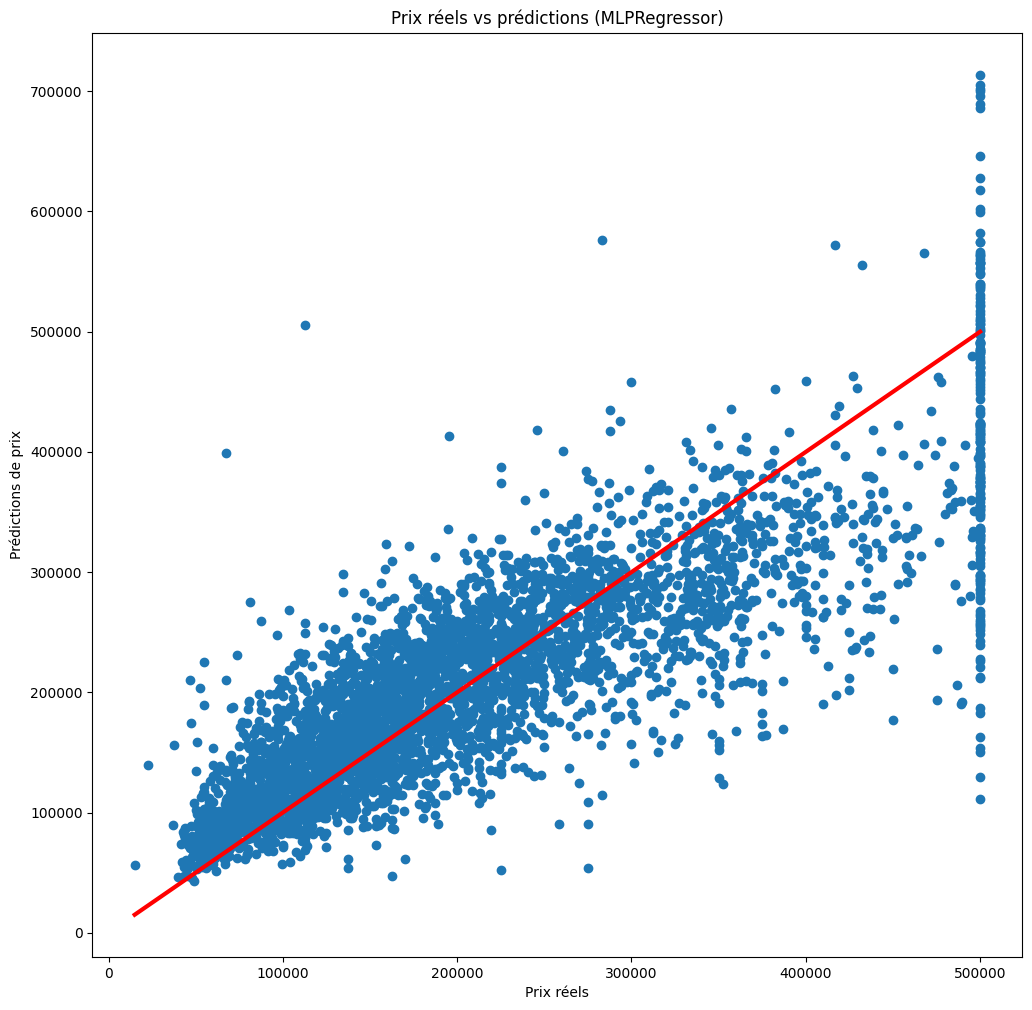

RMSE: 65306.00426668254
R2: 0.6881303245635373


In [17]:

# Séparation en jeu d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(explanatory_vars, target, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=250, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

# Prédictions
y_pred = mlp_reg.predict(X_test_scaled)

# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix réels")
plt.ylabel("Prédictions de prix")
plt.title("Prix réels vs prédictions (MLPRegressor)")
plt.show()

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calcul du coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

### RandomForestClassifier


Types de données après traitement des valeurs manquantes :
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity         int64
dtype: object
Accuracy: 0.8309108527131783
Classification Report:
              precision    recall  f1-score   support

     classe1       0.90      0.91      0.90      2414
     classe2       0.74      0.81      0.78      1371
     classe3       0.36      0.09      0.14       159
     classe4       0.70      0.58      0.64       184

    accuracy                           0.83      4128
   macro avg       0.68      0.60      0.61      4128
weighted avg       0.82      0.83      0.82      4128



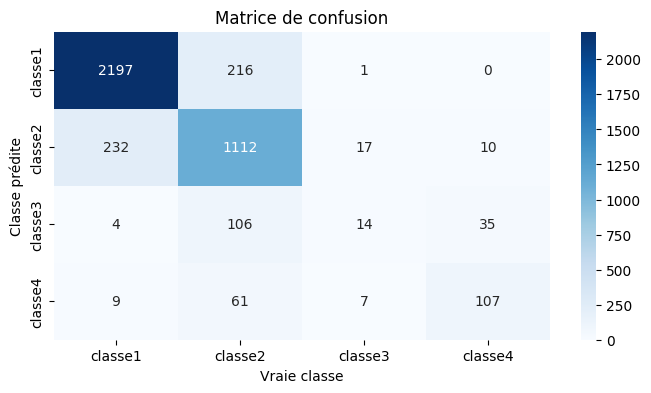

In [19]:
data = pd.read_csv('housing.csv')

# Ajouter une colonne 'classe_prix' en fonction des intervalles de prix
prix_bins = [0, 200000, 400000, 500000, np.inf]
prix_labels = ['classe1', 'classe2', 'classe3', 'classe4']
data['classe_prix'] = pd.cut(data['median_house_value'], bins=prix_bins, labels=prix_labels, right=False)

# Diviser les données en caractéristiques (X) et cible (y)
X = data.drop(['median_house_value', 'classe_prix'], axis=1)
y = data['classe_prix']

# Encodage des variables catégorielles
label_encoder = LabelEncoder()
X['ocean_proximity'] = label_encoder.fit_transform(X['ocean_proximity'])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gestion des valeurs manquantes pour l'ensemble de test
X_test = X_test.fillna(X_test.mean())

# Vérifier le type des données après traitement des valeurs manquantes
print("\nTypes de données après traitement des valeurs manquantes :")
print(X_test.dtypes)

# Modèle RandomForestClassifier pour la classification
classifier_model = RandomForestClassifier()
classifier_model.fit(X_train, y_train)
classifier_predictions = classifier_model.predict(X_test)

# Mesures de performance
accuracy = accuracy_score(y_test, classifier_predictions)
report = classification_report(y_test, classifier_predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, classifier_predictions, labels=prix_labels)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=prix_labels, yticklabels=prix_labels)
plt.xlabel('Vraie classe')
plt.ylabel('Classe prédite')
plt.title('Matrice de confusion')
plt.show()



### CNN avec des classes

In [21]:
data = pd.read_csv('housing.csv')

# Ajouter une colonne 'classe_prix' en fonction des intervalles de prix
prix_bins = [0, 200000, 400000, 500000, np.inf]
prix_labels = ['classe1', 'classe2', 'classe3', 'classe4']
data['classe_prix'] = pd.cut(data['median_house_value'], bins=prix_bins, labels=prix_labels, right=False)

# Étape 2: Exploration des données (EDA)
print(data.describe())

# Étape 3: Prétraitement des données
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
data_encoded = data_encoded.dropna()

X_encoded = data_encoded.drop(['median_house_value', 'classe_prix'], axis=1)
y_encoded = data_encoded['classe_prix']

# Encodage des classes de prix en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_encoded)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Étape 4: Choix du modèle CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, activation softmax

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Étape 5: Entraînement du modèle
model.fit(X_train_reshaped, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Étape 6: Évaluation du modèle
_, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Accuracy: {accuracy}")


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7170 - loss: 0.7019 - val_accuracy: 0.7827 - val_loss: 0.5718
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7904 - loss: 0.5356 - val_accuracy: 0.7962 - val_loss: 0.5370
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7964 - loss: 0.5036 - val_accuracy: 0.8003 - val_loss: 0.5282
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.5055 - val_accuracy: 0.8001 - val_loss: 0.5194
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4903 - val_accuracy: 0.8021 - val_loss: 0.5022
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.4727 - val_accuracy: 0.8030 - val_loss: 0.5053
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8139 - loss: 0.4748 - val_accuracy: 0.8030 - val_loss: 0.4920
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8128 - loss: 0.4653 - val_accuracy: 0.8040 - val_